In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pygam as gm
import copy as cp

(0.0, 15000.0)

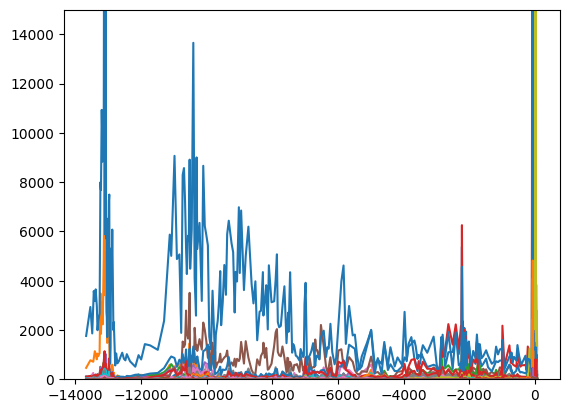

In [19]:
dirdatain = '../data_GG/'

myspecies = 'Alchemilla,Chenopodiaceae,Artemisia,Cichoroideae,Asteroideae,Carduus,Asteraceae,Vernonia,Polygonum,Tribulus,Galium,Brassicaceae,Caryophylaceae,Swertia,Senecio,Erica,Hypericum,Anthospermum,Cerastium,Apiaceae,Podocarpus,Euclea,Hagenia,Juniperus,Myrsine,Rapanea,Rosa,Schefflera,Brucea,Sapotaceae,Iridaceae,Anthyllis,Maytenus,Buxus,Psydrax,Celastraceae,Celtis,Dodonaea,Ekebergia,Ephedra,Clematis,Myrica,Hypoestes,Ziziphus,Acanthus,Allophylus,Acacia,Combretum,Commiphora,Cussonia,Dobera,Lannea,Macaranga,Olea,Jasminum,Rhus,Securinega,Teclea,Zanthoxylum,Cassia,Capparidaceae,Acalypha,Euphorbia,Euphorbiacea,Phyllantus,Tamarindus,Alchornea,Aloe,Asphodellus,Leguminosae,Rubiaceae,Blepharis,Justicia,Heliotropium,Kohautia,Indigofera,Lamiaceae,Cerealia,Plantago,Planceolata,Poaceae,Rumex,Solanum,Urticaceae,Ricinus,Saussurea'.replace(' ','_').split(',')

mydf_GG_original = pd.read_csv(dirdatain + 'bale_pollen.csv')

mydf_GG_original['kaBP'] = - mydf_GG_original['kaBP']
mydf_GG_original = mydf_GG_original.fillna(0)
mydf_GG_original = mydf_GG_original.sort_values(by=['kaBP'])

all_species = list(mydf_GG_original.columns)
metrics_list = ['accrate', 'volume', 'Lycopodium', 'Lyc.conc']

mydf_GG_original['kaBP'] = mydf_GG_original['kaBP'] * 1000  # Convert from ka to years
mydf_GG_original.rename(columns={'kaBP': 'cal BP'}, inplace=True)

mydf_pollen = mydf_GG_original[['cal BP'] + metrics_list + myspecies]
mydf_pollen = mydf_pollen.set_index('cal BP')

multipliers = mydf_pollen['Lyc.conc'] * mydf_pollen['accrate'] / (mydf_pollen['volume'] * mydf_pollen['Lycopodium'])

for spec in myspecies:
    mydf_pollen[spec] = mydf_pollen[spec] * multipliers

mydf_pollen = mydf_pollen[myspecies]
plt.plot(mydf_pollen);
plt.ylim(0,15000)

In [20]:
# GAM over multipliers
n_splines = 300
fit_type = 'fit_%d_0.01' %(n_splines)
vx = gm.utils.make_2d(multipliers.index, verbose=False).astype('float')
vy = multipliers.values

gam_multipliers = gm.GAM(terms='auto', n_splines=n_splines, lam=0.01).fit(vx, vy)

XX = gam_multipliers.generate_X_grid(term=0, n=n_splines)
YY = gam_multipliers.predict(XX)

gam_multipliers_df = pd.DataFrame({
    'cal BP': XX[:, 0],
    'multipliers': YY
})

gam_multipliers_df.to_pickle('GAM_species_GG/gam_multipliers_%s.pkl' %(fit_type))